# Figure 3

NOTE: If you're running this on **Google Colab**, then uncomment and run the next two cells.

In [ ]:
# !git clone https://github.com/Mark-Kramer/Aperiodic-Exponent-Model.git

In [ ]:
# import sys
# sys.path.insert(0,'/content/Aperiodic-Exponent-Model')

---

## Load packages

In [1]:
import numpy as np
import scipy.io as io
import matplotlib.pyplot as plt
from   matplotlib.backends.backend_pdf import PdfPages

## Load functions for computations and plotting

In [2]:
from one_over_f_functions import *

## Define the model

In [ ]:
# Simulate the generative model.
def predator_prey(noise,params):
    
    N = 200000
    dt = 0.0002
    alpha = params["alpha"]
    gamma = params["gamma"]
    
    x = np.zeros([N])                         # Output variables
    y = np.zeros([N])
    t = np.arange(N)*dt                       # Time [a.u.]
    
    x[0] = 0.2+0.2*np.random.rand()           # Initial conditions
    y[0] = 0.2+0.2*np.random.rand()
    
    for n in np.arange(N-1):                  # Simulate the model
        x[n+1] = x[n] + dt*(x[n]*(gamma-x[n])/gamma - x[n]*y[n] + noise["x"]*np.random.randn())
        y[n+1] = y[n] + dt*(-alpha*y[n]             + x[n]*y[n] + noise["y"]*np.random.randn())
    
    return x,y,t

## Figure 3A-D: Simulate the model, and plot it.

In [ ]:
noise = {"x":[],                           # Set the prey noise,
         "y":1  }                          # ... and the predator noise.
params= {"alpha":0.25,                     # Set the parameters.
         "gamma":0.6}
fig, ((ax1, ax2,), (ax3, ax4)) = plt.subplots(2, 2,figsize=(12, 6), dpi=80)

noise["x"]=0.0;                            # Prey noise = 0.
[x,y,t] = predator_prey(noise,params)      # Simulate model,
[S,f]   = compute_spectrum(x,t)            # ... compute the spectrum & fit aperiodic exponent.
[aperiodic_exponent, x_linear_fit, y_linear_fit] = estimate_aperiodic_exponent(S,f,[50,250])
make_plots(t,x, f,S, x_linear_fit,y_linear_fit,aperiodic_exponent, ax1,ax3);
ax1.set_ylim([0.2, 0.4]); ax1.set_xlabel('Time [a.u.]'); ax3.set_xlim([-1,3]); ax3.set_ylim([-25, 0]);

noise["x"]=0.01;                           # Prey noise > 0.
[x,y,t] = predator_prey(noise,params)      # Simulate model,
[S,f]   = compute_spectrum(x,t)            # ... compute the spectrum & fit aperiodic exponent.
[aperiodic_exponent, x_linear_fit, y_linear_fit] = estimate_aperiodic_exponent(S,f,[50,250])
make_plots(t,x, f,S, x_linear_fit,y_linear_fit,aperiodic_exponent, ax2,ax4);
ax2.set_ylim([0.2, 0.4]); ax2.set_xlabel('Time [a.u.]'); ax4.set_xlim([-1,3]); ax4.set_ylim([-25, 0]);

#fig.savefig("./PDFs/Figure-3ABCD.pdf", bbox_inches='tight')

## Figure 3E (Part 1): Iterate over values of noise and plot aperiodic exponent
This part is slow.

In [ ]:
noise = {"x":[],                                    # Prepare the noise variable.
         "y":1  }                                   # ... fix the predator noise,
noise_values = [0,1e-5,2e-5,3e-5,4e-5,5e-5,         # ... list the prey noises.
                  1e-4,2e-4,3e-4,4e-4,5e-4,
                  6e-4,7e-4,8e-4,9e-4,
                  1e-3,1.5e-3,2e-3,3e-3,4e-3,5e-3]
params = {"alpha":[], "gamma":[]}
N_replicates = 10                                   # Number of times to repeat simulation.
alpha_params = np.arange(0,  0.51,0.1)              # Iterate over parameter alpha,
gamma_params = np.arange(0.1,1.01,0.1)              # ... and over parameter gamma.

aperiodic_exponents    = np.empty((np.size(alpha_params), np.size(noise_values), np.size(gamma_params)*N_replicates))
aperiodic_exponents[:] = np.nan

for [j,alpha] in enumerate(alpha_params):           # For each alpha model parameter,
    params["alpha"] = alpha

    for [n, prey_noise] in enumerate(noise_values): # ... and for each prey noise,
        noise["x"]=prey_noise
    
        counter = 0
        for gamma in (gamma_params):                # ... sim model with different gamma parameters,
            params["gamma"] = gamma
        
            print("alpha=",alpha, ", noise_x=",prey_noise, ", gamma=",gamma)
        
            if (1-alpha/gamma)>0:                   # Check physical condition for population > 0.
        
                print("Run it")

                for r in np.arange(N_replicates):   # ... and repeat sim N_replicate times,
                    [x,y,t] = predator_prey(noise,params)
                    [S,f]  = compute_spectrum(x,t)                     # ... compute the spectrum,
                    ae = estimate_aperiodic_exponent(S,f,[50,250])[0]  # ... fit aperiodic exponent,
                    aperiodic_exponents[j,n,counter] = ae              # ... and save it.
                    counter=counter+1
                                                    # Save the results.
res = {"alpha_params":alpha_params, "gamma_params":gamma_params, "noise_values":noise_values, "aperiodic_exponents":aperiodic_exponents}
io.savemat(str('Figure-3E.mat'), res)

## Figure 3E (Part 2): Load the aperiodic exponent, and plot it.

This part is fast.

alpha 0.0 - color: red
alpha 0.1 - color: orange
alpha 0.2 - color: yellow
alpha 0.30000000000000004 - color: green
alpha 0.4 - color: blue
alpha 0.5 - color: indigo


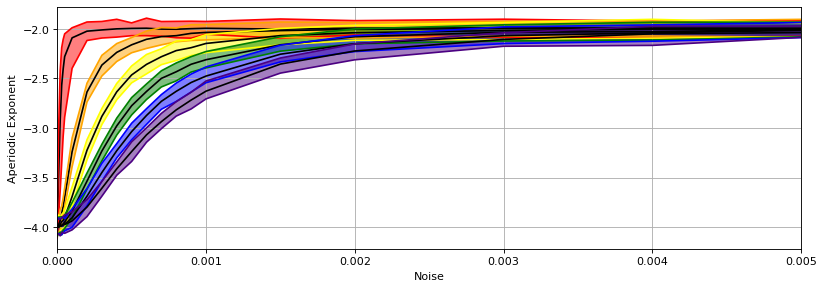

In [3]:
# Note: if you're running on Google Colab, then load the .mat file like this:
# res = io.loadmat("/content/Aperiodic-Exponent-Model/Figure-3E.mat");

# Or, if not running on Google Colab, then load the .mat file like this:
res = io.loadmat("Figure-3E.mat")

fig = plt.figure(figsize=(12, 4), dpi=80)
alpha_params = res["alpha_params"][0]
colors = ["red", "orange", "yellow", "green", "blue", "indigo"]

for [k,alpha] in enumerate(alpha_params):
    print("alpha", alpha, "- color:", colors[k])
    res_at_a = {"noise_values":res["noise_values"], "aperiodic_exponents":res["aperiodic_exponents"][k,:],
                "color":colors[k]};
    make_plot_ae_vs_noise(res_at_a);
plt.xlim([0,0.005]);

#fig.savefig("./PDFs/Figure-3E.pdf", bbox_inches='tight')